# Churn Reduction

In [157]:
# Load All Libraries
%matplotlib inline 
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn import metrics

In [159]:
# Load Data
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [160]:
# Merge Data
frames = [train_df, test_df]

In [161]:
customer_df = pd.concat(frames)

In [162]:
customer_df.shape

(5000, 21)

In [163]:
customer_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [165]:
# Missing Value Analysis
pd.DataFrame(customer_df.isnull().sum())

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


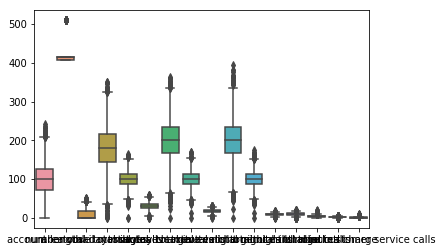

In [167]:
# Outlier Analysis
sns.boxplot(data=customer_df[['account length','area code','international plan','voice mail plan', 'number vmail messages','total day minutes','total day calls','total day charge','total eve minutes',          
'total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','number customer service calls','Churn']])

fig=plt.gcf()

In [168]:
#dropping the unique values 
customer_df.drop('phone number',axis = 1, inplace = True) 

In [169]:
# Convert into discreet value
label_encoder = preprocessing.LabelEncoder()

In [170]:
# State is string and we want discreet integer values
customer_df['state'] = label_encoder.fit_transform(customer_df['state'])
customer_df['international plan'] = label_encoder.fit_transform(customer_df['international plan'])
customer_df['voice mail plan'] = label_encoder.fit_transform(customer_df['voice mail plan'])
customer_df['Churn'] = label_encoder.fit_transform(customer_df['Churn'])

In [171]:
customer_df.dtypes

state                              int64
account length                     int64
area code                          int64
international plan                 int64
voice mail plan                    int64
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                              int64
dtype: object

In [172]:
cnames = ['state','account length','area code','international plan','voice mail plan', 'number vmail messages','total day minutes','total day calls','total day charge','total eve minutes',          
'total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','number customer service calls','Churn']

In [173]:
# Correlation Graph
df_corr = customer_df.loc[:,cnames]

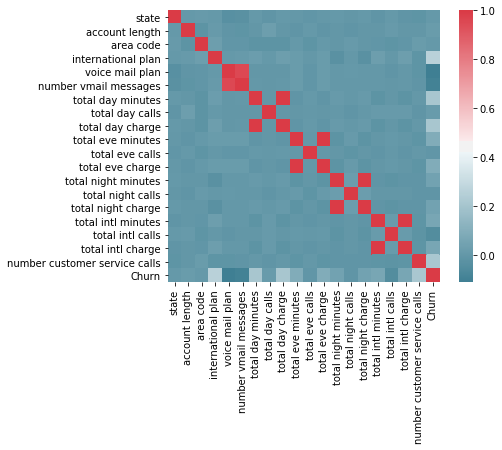

In [174]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [175]:
#dropping redundant variables
customer_df.drop(['number vmail messages','total day charge','total eve charge','total night charge','total intl charge'],axis = 1, inplace = True)

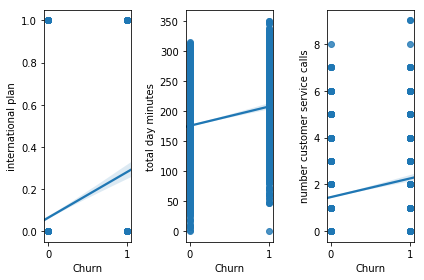

In [176]:
l = ['international plan','total day minutes','number customer service calls']
for i in range(0,3):
    plt.subplot(1,3,i+1)
    target_plot = sns.regplot(x = 'Churn', y = l[i], data = customer_df)
    plt.tight_layout()

# Geographical Plotting

In [177]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [178]:
states_ = customer_df['state']
target = customer_df['Churn']

In [179]:
states = states_.value_counts()
state_ls = list(states.index)
state_vs = list(states.values)

In [180]:
init_notebook_mode(connected=True) 

In [181]:
data = dict(type='choropleth',
            colorscale = 'Picnic',
            locations = state_ls,
            z = state_vs,
            locationmode = 'USA-states',
            text = target,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Total Customers"}
            )

In [182]:
layout = dict(title = 'US Customers Heatmap by State',
              geo = dict(scope='usa'))

In [183]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

# Target Class

In [184]:
ds = target.value_counts()
ds = pd.DataFrame(ds)
ds.reset_index(inplace = True)
ds

,index,Churn
0,0,4293
1,1,707


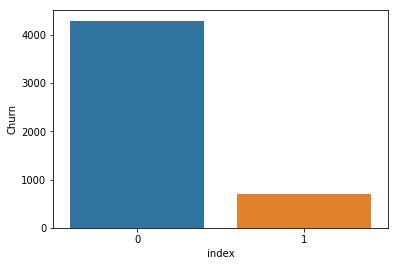

In [185]:
sns.barplot(x = ds['index'],y = ds['Churn'])

# Model Selection and Model Development

In [117]:
X_data = customer_df.drop('Churn',axis = 1)
y_data = customer_df['Churn']

In [118]:
#Test,train split using sklearn
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=101) 

In [119]:
# Predictor Variable
X_test.shape

(1500, 14)

In [124]:
# Predictor Variable
X_train.shape

(3500, 14)

In [125]:
# Target Variable
y_train.shape

(3500,)

In [126]:
# Target Variable
y_test.shape

(1500,)

In [127]:
#model instances
model_dt_imb = DecisionTreeClassifier()
model_KNN_imb = KNeighborsClassifier()
model_Log_imb= LogisticRegression()
model_RF_imb = RandomForestClassifier(n_estimators=100)


#model training
model_dt_imb.fit(X_train,y_train)
model_KNN_imb.fit(X_train,y_train)
model_Log_imb.fit(X_train,y_train)
model_RF_imb.fit(X_train,y_train)

#model predictions
pred_dt_imb = model_dt_imb.predict(X_test)
pred_KNN_imb = model_KNN_imb.predict(X_test)
pred_Log_imb = model_Log_imb.predict(X_test)
pred_RF_imb = model_RF_imb.predict(X_test)

Decision_Trees
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1297
          1       0.72      0.74      0.73       203

avg / total       0.93      0.93      0.93      1500



[[1239   58]
 [  52  151]]
KNN
             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1297
          1       0.63      0.21      0.31       203

avg / total       0.85      0.88      0.85      1500



[[1272   25]
 [ 161   42]]
Logistic
             precision    recall  f1-score   support

          0       0.89      0.97      0.93      1297
          1       0.51      0.20      0.28       203

avg / total       0.83      0.87      0.84      1500



[[1258   39]
 [ 163   40]]
RF
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1297
          1       0.93      0.67      0.78       203

avg / total       0.95      0.95      0.95      1500



[[1287   10]
 [  67 

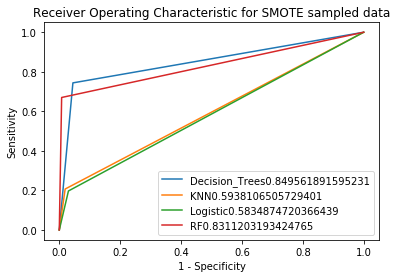

In [129]:
model_predictions = [pred_dt_imb,pred_KNN_imb,pred_Log_imb,pred_RF_imb] #list for every models predictions
models = ['Decision_Trees','KNN','Logistic','RF'] #list to specify the model names

#looping multiple models for plotting a single ROC Curve to evaluate models performance
for plots in range(0,4):
    fpr, tpr, thresh = metrics.roc_curve(y_test, model_predictions[plots])
    auc = metrics.roc_auc_score(y_test, model_predictions[plots])
    plt.plot(fpr,tpr,label=models[plots]+str(auc))
    plt.legend(loc=0)
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title('Receiver Operating Characteristic for SMOTE sampled data')
    print(models[plots])
    print(classification_report(y_test,model_predictions[plots]))
    print('\n')
    print(confusion_matrix(y_test,model_predictions[plots]))
    plt.savefig('Imb_ROC.png')

Cross Validation

In [135]:
y = customer_df['Churn'].values
y.size

5000

In [138]:
customer_df.drop(["Churn"], axis = 1, inplace=True)

In [140]:
X = customer_df.values
X.shape

(5000, 14)

Scaling

In [141]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [144]:
from sklearn.model_selection import StratifiedKFold
#'n' are the no of folds for the stratified sampling
skf = StratifiedKFold(n_splits=10) 
skf.get_n_splits(X, y)

10

In [145]:
ensembles = [ensemble.GradientBoostingClassifier(),svm.SVC(),ensemble.RandomForestClassifier(),neighbors.KNeighborsClassifier(),
            LogisticRegression()]

In [146]:
method = ['GBM','SVM','Random Forest','KNN','Logistic Regression']

In [148]:
y_pred = y.copy()

GBM
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      4293
          1       0.92      0.72      0.81       707

avg / total       0.95      0.95      0.95      5000

SVM
             precision    recall  f1-score   support

          0       0.92      0.99      0.96      4293
          1       0.88      0.50      0.64       707

avg / total       0.92      0.92      0.91      5000

Random Forest
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      4293
          1       0.92      0.63      0.75       707

avg / total       0.94      0.94      0.94      5000

KNN
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      4293
          1       0.76      0.30      0.43       707

avg / total       0.88      0.89      0.87      5000

Logistic Regression
             precision    recall  f1-score   support

          0       0.88      0.98      0.

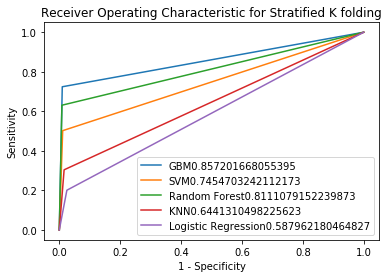

In [149]:
for methods in range(0,5):
    for train_index, test_index in skf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = ensembles[methods]
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    print(method[methods])
    print(classification_report(y,y_pred))
    fpr, tpr, thresh = metrics.roc_curve(y, y_pred)
    auc = metrics.roc_auc_score(y, y_pred)
    plt.plot(fpr,tpr,label=method[methods]+str(auc))
    plt.legend(loc=0)
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title('Receiver Operating Characteristic for Stratified K folding')
    plt.savefig('_ROC.png')
  

# Conclusion

In [150]:
gb_model = ensemble.GradientBoostingClassifier()
gb_model.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

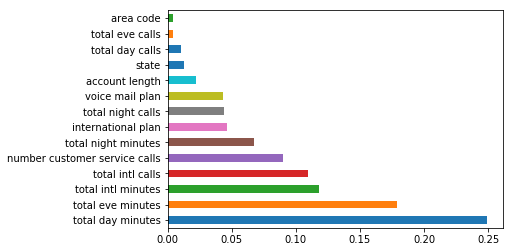

In [151]:
vars_ = (pd.Series(gb_model.feature_importances_, index=customer_df.columns)
   .nlargest(15)
   .plot(kind='barh'))
plt.savefig('varz_imp.png')

The important variables for the churn reduction are:

1. Total Day, Eve and International Minutes are highly relates with respective charges
2. International call is specially a important variable
3. Number of Customer Service Calls



The company should optimize these parameters to reduce the Customer Churn